In [1]:
import logging
logging.root.setLevel(logging.INFO)


In [2]:
import random

from xcs import XCSAlgorithm
from xcs.scenarios import Scenario

In [3]:
from utils.xcs_utils import *

In [4]:
exploration_cycles = 4000
exploitation_cycles = 1000
input_size = 8
logging.root.setLevel(logging.INFO)
scenario = MazeScenario(input_size)
scenario.maze.reset()
scenario.maze.render()


■ ■ ■ ■ ■ ■ ■ ■
■ □ A ■ □ □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [5]:
import numpy as np
algorithm = XCSAlgorithm()
algorithm.max_population_size = 1600
algorithm.learning_rate = .1
algorithm.error_threshold = .01              # epsilon_0
algorithm.ga_threshold = 25
algorithm.crossover_probability = 0.5
algorithm.mutation_probability = 0.01
algorithm.initial_prediction = float(np.finfo(np.float32).tiny)        # p_I
algorithm.initial_error = float(np.finfo(np.float32).tiny)            # epsilon_I
algorithm.initial_fitness = float(np.finfo(np.float32).tiny)           # F_I
algorithm.wildcard_probability = 0

In [6]:
other_metrics = other_avg_experiment(
                                     maze=scenario,
                                     algorithm=algorithm,
                                     number_of_tests=5,
                                     explore_trials=exploration_cycles,
                                     exploit_trials=exploitation_cycles
                                    )


Executing 0 experiment
Executing 1 experiment
Executing 2 experiment
Executing 3 experiment
Executing 4 experiment


In [7]:
display(other_metrics)

,steps_in_trial,population,numerosity
trial,,,
0,34.2,32.8,32.8
100,26.8,349.6,1600.0
200,40.6,387.2,1600.0
300,43.2,404.6,1600.0
400,44.8,422.4,1600.0
500,38.0,436.4,1600.0
600,43.2,425.6,1600.0
700,45.2,422.8,1600.0
800,27.6,436.4,1600.0


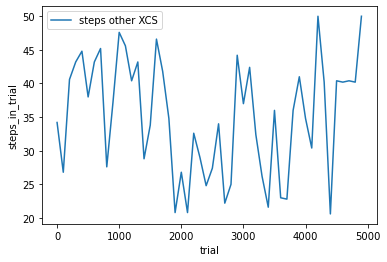

In [8]:
import pandas as pd

ax = other_metrics["steps_in_trial"].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps_in_trial")
ax.legend(["steps other XCS"])

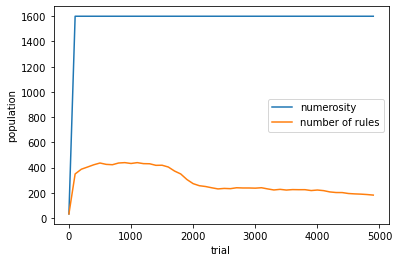

In [9]:
ax = other_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

In [10]:
from lcs.agents.xcs import Configuration
from utils.xcs_utils import *
                    

cfg = Configuration(number_of_actions=8,
                    max_population=1600,
                    covering_wildcard_chance = 1,
                    metrics_trial_frequency=100,
                    user_metrics_collector_fcn=xcs_metrics)

In [11]:
from lcs.agents.xcs import XCS


agent = XCS(cfg)
my_metrics = avg_experiment(scenario,
                    cfg,
                    number_of_tests=5,
                    explore_trials=exploration_cycles,
                    exploit_metrics=exploitation_cycles)


INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': [8.351763182038894e-41, 2.684246465823646e-40, 1.0796243357820292e-40, 1.2977983114746726e-40, 1.2477594099419885e-40, 9.545341686853277e-41, 1.799677216749012e-40, 1.2225316399104433e-40], 'perf_time': 0.017708000000084212, 'population': 88, 'numerosity': 98}


Executing 0 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 3, 'reward': [41.154258696509714, 8.776242020097818, 293.3803157860853, 10.012491409235999, 6.912105818656064, 9.022315205091475, 8.260170466908283, 6.750874721163461], 'perf_time': 0.0017593000000033499, 'population': 209, 'numerosity': 462}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 30, 'reward': [131.43912714398914, 42.61145166832979, 11.254477521476476, 5.292267996030028, 8.422836372407614, 7.044171240055251, 5.838247045128215, 10.633941448608752], 'perf_time': 0.018027200000005905, 'population': 209, 'numerosity': 482}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 12, 'reward': [16.765161964121184, 41.43026117203839, 179.84437445205046, 38.78444720987311, 23.79316858351004, 14.756478002442094, 30.27950316246688, 40.22325336220314], 'perf_time': 0.006743099999994229, 'population': 209, 'numerosity': 488}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [87.05739628323796, 61.3965555055

Executing 1 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 1, 'reward': [224.49020698754595, 24.977973264382925, 127.67824050773923, 25.58622866680961, 22.30237639245399, 19.951008475788573, 18.747069224771533, 28.324688890512068], 'perf_time': 0.0006424000000606611, 'population': 208, 'numerosity': 382}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 19, 'reward': [27.024834050046003, 5.452867687673865, 105.58112316383512, 13.08845801385637, 4.42280551337563, 4.313953999702208, 4.994528737235069, 1.3408004792038497], 'perf_time': 0.010488600000144288, 'population': 208, 'numerosity': 390}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [4.336789732383106, 9.3164571638008, 4.3851817688129024, 2.7578742727029972, 4.053125461117215, 4.55906102473867, 2.8498261389626522, 5.340888111193741], 'perf_time': 0.027713799999901312, 'population': 208, 'numerosity': 392}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 27, 'reward': [43.18374054358612, 35.3701163135

Executing 2 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 1, 'reward': [112.19890220501115, 31.50067682087363, 117.60077710933695, 8.850898975120579, 7.386273974716931, 7.6461091721074474, 8.780498920889027, 10.581782992386614], 'perf_time': 0.0006442999999762833, 'population': 208, 'numerosity': 514}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 11, 'reward': [122.02692107403726, 65.21108855242568, 10.256795221944117, 20.355164887429655, 22.873959032900366, 22.08557233637856, 25.43436432876262, 30.30863533011937], 'perf_time': 0.006128899999794157, 'population': 208, 'numerosity': 546}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 50, 'reward': [52.898135251657465, 14.342234221831164, 25.529269644769652, 23.740317842543774, 23.53659275911617, 14.828524972561882, 22.00769404065573, 7.220559662608916], 'perf_time': 0.028017600000111997, 'population': 208, 'numerosity': 552}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 2, 'reward': [45.01399631122512, 62.738256

Executing 3 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 50, 'reward': [31.919639486458948, 39.43075999362948, 5.631461408052612, 10.987530210068764, 6.235225658390846, 7.619407238053627, 4.549848014638483, 7.8626707275124375], 'perf_time': 0.02723599999990256, 'population': 208, 'numerosity': 560}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 29, 'reward': [106.4103075664327, 3.917922354416296, 48.36224436181092, 2.3509902013943913, 2.9931023269771364, 2.750020242705175, 2.1417413023464165, 1.9480886805494162], 'perf_time': 0.015913299999965602, 'population': 209, 'numerosity': 568}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 3, 'reward': [15.156525928300889, 125.79861362294608, 189.92364303793073, 19.862178291285108, 19.585613572228397, 30.530436853484886, 33.02384856497434, 22.338951731085313], 'perf_time': 0.0015696000000389176, 'population': 209, 'numerosity': 576}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [13.3822026501552, 29.067792

Executing 4 experiment


INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 6, 'reward': [280.6061549400383, 53.010340056411906, 31.513279379679613, 23.71032003062134, 25.129387476239014, 11.952297519973671, 13.66940786573029, 28.50681063205418], 'perf_time': 0.0031473000001369655, 'population': 208, 'numerosity': 436}
INFO:lcs.agents.Agent:{'trial': 800, 'steps_in_trial': 11, 'reward': [180.53547853133645, 233.6382707822118, 26.23385870138228, 31.02098072399437, 30.585932393139586, 10.063845422259986, 7.744457172181987, 11.762987614101435], 'perf_time': 0.005982300000141549, 'population': 208, 'numerosity': 446}
INFO:lcs.agents.Agent:{'trial': 1200, 'steps_in_trial': 24, 'reward': [8.957186976589739, 76.18327299023127, 213.49989641662728, 10.94915976631152, 3.881170590886205, 14.747276022199674, 10.201774285520523, 4.3356823025246145], 'perf_time': 0.013186500000074375, 'population': 208, 'numerosity': 458}
INFO:lcs.agents.Agent:{'trial': 1600, 'steps_in_trial': 50, 'reward': [24.56005131742582, 40.471821

In [12]:
display(my_metrics)

,steps_in_trial,perf_time,population,numerosity
trial,,,,
0,50.0,0.015150,76.8,86.0
100,32.0,0.017678,208.0,410.0
200,23.2,0.012710,208.2,448.8
300,38.2,0.020876,208.2,465.6
400,12.2,0.006686,208.2,470.8
500,20.6,0.011172,208.2,474.0
600,34.8,0.019620,208.4,477.2
700,40.2,0.022290,208.4,486.0
800,20.0,0.011308,208.4,486.4


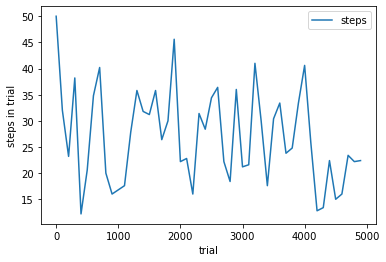

In [13]:
import pandas as pd

ax = my_metrics['steps_in_trial'].plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps in trial")
ax.legend(["steps"])


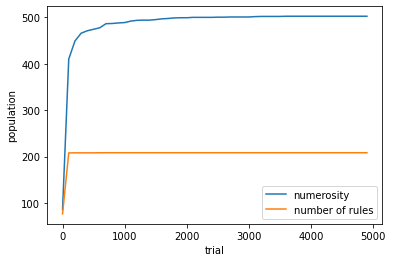

In [14]:
ax = my_metrics[['numerosity', 'population']].plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["numerosity", "number of rules"])

#### Conclusions
None so far.